## Covid-19: Análisis del progreso de la vacunación mundial

In [27]:
!pip install a-world-of-countries

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as ss
import csv
import awoc
import numpy as np
import sklearn
from sklearn import datasets
import plotly.graph_objs as go

import pandas_profiling as pp
import pandas.util.testing as tm

#### Variables


1. **Country:** es el país para el que se proporciona la información sobre la vacunación;
2. **Country ISO Code** - código ISO del país;
3. **Fecha** - fecha para la entrada de datos; para algunas de las fechas tenemos sólo las vacunas diarias, para otras, sólo el total (acumulado);
3. **Total number of vaccinations** - es el número absoluto de vacunas totales en el país;
4. **Total number of people vaccinated** - una persona, dependiendo del esquema de vacunación, recibirá una o más (normalmente 2) vacunas; en un momento dado, el número de vacunaciones puede ser mayor que el número de personas;
5. **Número total de personas totalmente vacunadas** - es el número de personas que recibieron todo el conjunto de vacunas según el esquema de inmunización (típicamente 2); en un momento determinado, puede haber un cierto número de personas que recibieron una vacuna y otro número (menor) de personas que recibieron todas las vacunas del esquema;
6. **Daily vaccinations (raw):** para una determinada entrada de datos, el número de vacunaciones para esa fecha/país;
7. **Daily vaccinations:** para una determinada entrada de datos, el número de vacunaciones para esa fecha/país;
8. **Total vaccinations per hundred** - relación (en porcentaje) entre el número de vacunaciones y la población total hasta la fecha en el país;
9. **Total number of people vaccinated per hundred**  - relación (en porcentaje) entre la población vacunada y la población total hasta la fecha en el país;
10. **Total number of people fully vaccinated per hundred** - relación (en porcentaje) entre la población totalmente vacunada y la población total hasta la fecha en el país;
11. **Number of vaccinations per day** - número de vacunaciones diarias para ese día y país;
    Daily vaccinations per million  - relación (en ppm) entre el número de vacunaciones y la población total para la fecha en el país;
12. **Vaccines used in the country** - número total de vacunas utilizadas en el país (hasta la fecha);
13. **Source name** - fuente de la información (autoridad nacional, organización internacional, organización local, etc.);
14. **Source website**  - sitio web de la fuente de información.


In [29]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [30]:
#df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',sep=',')

In [31]:
df = pd.read_csv("country_vaccinations.csv")
df2 = pd.read_csv("covid19_country_population.csv")

In [32]:
#getting a profile summary
pp.ProfileReport(df)

In [33]:
df2 = df2.rename(columns={'CountryAlpha3Code': 'iso_code'})

Eliminamos la columna daily_vaccinations_raw, ya que es una versión "a sucio" de daily_vaccinations

In [34]:
df = df.drop('daily_vaccinations_raw', axis=1)

Ponemos la fecha en nuestro formato y ordenamos los datos por fechas de vacunación (de la más antigua a la más actual)

In [35]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [36]:
df['date'] = pd.to_datetime(df['date'])
#df = df.sort_values('date', ascending=True)

df['date'] = df['date'].dt.strftime('%Y-%m-%d')


In [37]:
df[['date']] = df[['date']].apply(pd.to_datetime)

In [38]:
df.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [39]:
# Combining the two datasets using pd.join, ensuring that three common columns are used as the index.

#df_1 = df.set_index(['iso_code', 'date'])
df_1 = df.set_index('iso_code')
df_2 = df2.set_index('iso_code')
covid_vaccine_data = df_1.join(df_2)
covid_vaccine_data

country       date  total_vaccinations  people_vaccinated  \
iso_code                                                                  
ABW             Aruba 2021-04-20             43945.0            27511.0   
AFG       Afghanistan 2021-02-22                 0.0                0.0   
AFG       Afghanistan 2021-02-23                 NaN                NaN   
AFG       Afghanistan 2021-02-24                 NaN                NaN   
AFG       Afghanistan 2021-02-25                 NaN                NaN   
...               ...        ...                 ...                ...   
ZWE          Zimbabwe 2021-04-17            311901.0           276095.0   
ZWE          Zimbabwe 2021-04-18            314446.0           278583.0   
ZWE          Zimbabwe 2021-04-19            316991.0           280568.0   
ZWE          Zimbabwe 2021-04-20            325007.0           288229.0   
ZWE          Zimbabwe 2021-04-21            332996.0           295631.0   

          people_fully_vaccinated  daily_vaccinations  \
iso_code                                                
ABW                       16434.0                 NaN   
AFG                           NaN                 NaN   
AFG                           NaN              1367.0   
AFG                           NaN              1367.0   
AFG                           NaN              1367.0   
...                           ...                 ...   
ZWE                       35806.0             12738.0   
ZWE                       35863.0             12993.0   
ZWE                       36423.0             11773.0   
ZWE                       36778.0             10950.0   
ZWE                       37365.0             10124.0   

          total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
iso_code                                                                  
ABW                                41.16                          25.77   
AFG                                 0.00                           0.00   
AFG                                  NaN                            NaN   
AFG                                  NaN                            NaN   
AFG                                  NaN                            NaN   
...                                  ...                            ...   
ZWE                                 2.10                           1.86   
ZWE                                 2.12                           1.87   
ZWE                                 2.13                           1.89   
ZWE                                 2.19                           1.94   
ZWE                                 2.24                           1.99   

          people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
iso_code                                                                        
ABW                                     15.39                             NaN   
AFG                                       NaN                             NaN   
AFG                                       NaN                            35.0   
AFG                                       NaN                            35.0   
AFG                                       NaN                            35.0   
...                                       ...                             ...   
ZWE                                      0.24                           857.0   
ZWE                                      0.24                           874.0   
ZWE                                      0.25                           792.0   
ZWE                                      0.25                           737.0   
ZWE                                      0.25                           681.0   

                    vaccines                source_name  \
iso_code                                                  
ABW          Pfizer/BioNTech        Government of Aruba   
AFG       Oxford/AstraZeneca  Government of Afghanistan   
AFG       Oxford/AstraZeneca  

Con unique_dates podemos saber que días se ha vacunado (teniendo en cuenta todos los países)

In [40]:
covid_vaccine_data['vaccines'].unique()

array(['Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinovac', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V', 'Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac', 'Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/A

In [41]:
unique_dates = df['date'].unique()
#unique_dates = covid_vaccine_data['date'].unique()
type(unique_dates[0])

numpy.datetime64

In [42]:
covid_vaccine_data.sort_values(by = 'date')

country       date  total_vaccinations  people_vaccinated  \
iso_code                                                                
CAN          Canada 2020-12-14                 5.0                NaN   
CHN           China 2020-12-15           1500000.0                NaN   
RUS          Russia 2020-12-15             28500.0            28500.0   
CAN          Canada 2020-12-15               723.0                NaN   
CHN           China 2020-12-16                 NaN                NaN   
...             ...        ...                 ...                ...   
HKG       Hong Kong 2021-04-21           1173131.0           773927.0   
HRV         Croatia 2021-04-21            726315.0           578273.0   
HUN         Hungary 2021-04-21           4872750.0          3419450.0   
RUS          Russia 2021-04-21          16821267.0         10520393.0   
ZWE        Zimbabwe 2021-04-21            332996.0           295631.0   

          people_fully_vaccinated  daily_vaccinations  \
iso_code                                                
CAN                           NaN                 NaN   
CHN                           NaN                 NaN   
RUS                           NaN                 NaN   
CAN                           NaN               718.0   
CHN                           NaN            187500.0   
...                           ...                 ...   
HKG                      399204.0             31719.0   
HRV                      148042.0             15543.0   
HUN                     1453300.0             65167.0   
RUS                     6300874.0            264781.0   
ZWE                       37365.0             10124.0   

          total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
iso_code                                                                  
CAN                                 0.00                            NaN   
CHN                                 0.10                            NaN   
RUS                                 0.02                           0.02   
CAN                                 0.00                            NaN   
CHN                                  NaN                            NaN   
...                                  ...                            ...   
HKG                                15.65                          10.32   
HRV                                17.69                          14.09   
HUN                                50.44                          35.40   
RUS                                11.53                           7.21   
ZWE                                 2.24                           1.99   

          people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
iso_code                                                                        
CAN                                       NaN                             NaN   
CHN                                       NaN                             NaN   
RUS                                       NaN                             NaN   
CAN                                       NaN                            19.0   
CHN                                       NaN                           130.0   
...                                       ...                             ...   
HKG                                      5.32                          4231.0   
HRV                                      3.61                          3786.0   
HUN                                     15.04                          6746.0   
RUS                                      4.32                          1814.0   
ZWE                                      0.25                           681.0   

                                                   vaccines  \
iso_code                                                      
CAN            Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
CHN             Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac   
RUS                                 Ep

## Preprocesado

### Missing Data

Veamos el número de NaN que tenemos por columnas

In [43]:
covid_vaccine_data.isnull().sum()/len(covid_vaccine_data)*100

country                                 0.000000
date                                    0.000000
total_vaccinations                     40.610955
people_vaccinated                      45.669231
people_fully_vaccinated                60.684086
daily_vaccinations                      1.790203
total_vaccinations_per_hundred         40.610955
people_vaccinated_per_hundred          45.669231
people_fully_vaccinated_per_hundred    60.684086
daily_vaccinations_per_million          1.790203
vaccines                                0.000000
source_name                             0.000000
source_website                          0.000000
Population                              7.747391
dtype: float64

In [44]:
print("Vaccination date starts from ",unique_dates[0]," till ",unique_dates[-1])
print("Total Countries vaccinated :",len(covid_vaccine_data["country"].unique()))
print("Total Vaccines  :",len(covid_vaccine_data["vaccines"].unique()))

Vaccination date starts from  2021-02-22T00:00:00.000000000  till  2020-12-22T00:00:00.000000000
Total Countries vaccinated : 190
Total Vaccines  : 33


In [45]:
covid_vaccine_data.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        7.796000e+03       7.132000e+03             5.161000e+03   
mean         4.264439e+06       2.872504e+06             1.363965e+06   
std          1.706338e+07       1.049500e+07             5.821235e+06   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          5.338975e+04       4.733725e+04             2.166300e+04   
50%          3.690585e+05       2.986665e+05             1.549070e+05   
75%          1.716405e+06       1.268145e+06             6.234240e+05   
max          2.159519e+08       1.344456e+08             8.759265e+07   

       daily_vaccinations  total_vaccinations_per_hundred  \
count        1.289200e+04                     7796.000000   
mean         7.349860e+04                       13.810776   
std          3.227763e+05                       21.739393   
min          0.000000e+00                        0.000000   
25%          8.950000e+02                        1.120000   
50%          5.811500e+03                        5.410000   
75%          2.753150e+04                       17.190000   
max          5.190143e+06                      198.010000   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
count                    7132.000000                          5161.000000   
mean                       10.210271                             5.028560   
std                        14.476132                             9.486776   
min                         0.000000                             0.000000   
25%                         1.030000                             0.560000   
50%                         4.265000                             2.030000   
75%                        12.730000                             5.340000   
max                       106.560000                            91.450000   

       daily_vaccinations_per_million    Population  
count                    12892.000000  1.211000e+04  
mean                      2908.923518  5.451768e+07  
std                       4836.307511  1.909313e+08  
min                          0.000000  1.258100e+04  
25%                        339.000000  2.083459e+06  
50%                       1431.000000  8.877067e+06  
75%                       3680.000000  3.426853e+07  
max                     118759.000000  1.397715e+09

In [46]:
def fill_na(df,column):
    for c in column :
        df[column] = df[column].fillna(0)

In [47]:
covid_vaccine_data.columns

Index(['country', 'date', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'Population'],
      dtype='object')

In [48]:
#columns to be filled with 0
cols = ['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million','Population']

#filling NA values
fill_na(covid_vaccine_data,cols)

#check any NA values

In [49]:
covid_vaccine_data.isnull().sum()

country                                0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
Population                             0
dtype: int64

Dividimos por continentes para estudiar el progreso de la vacunación.

### ORDENAMOS SEGUN CONTINENTES (UN DATA FRAME PARA CADA CONTINENTE)

#### Europa


In [50]:
# Initialize the AWOC class.
my_world = awoc.AWOC()

#### Europe

In [51]:
nations_of_europe = my_world.get_countries_list_of('Europe')

In [52]:
europe = covid_vaccine_data[covid_vaccine_data['country'].isin(nations_of_europe)]

#### Asia

In [53]:
nations_of_asia = my_world.get_countries_list_of('Asia')

In [54]:
asia = covid_vaccine_data[covid_vaccine_data['country'].isin(nations_of_asia)]
print(asia.shape)

(2999, 14)


#### Africa

In [55]:
nations_of_africa = my_world.get_countries_list_of('Africa')

In [56]:
africa = covid_vaccine_data[covid_vaccine_data['country'].isin(nations_of_africa)]
print(africa.shape)

(1358, 14)


#### Norte América

In [57]:
nations_of_north_america = my_world.get_countries_list_of('North America')

In [58]:
north_america = covid_vaccine_data[covid_vaccine_data['country'].isin(nations_of_north_america)]
print(north_america.shape)

(1940, 14)


### 1.Progreso del número de inmunizaciones

VAMOS A OBTENER EL PAÍS DE CADA CONTINENTE CON MAYOR NÚMERO DE PERSONAS VACUNADAS Y COMPARARLOS ENTRE SI. 

In [59]:
max_ = europe[europe['total_vaccinations'] == np.max(europe['total_vaccinations'])][['country','total_vaccinations']]
max_1 = africa[africa['total_vaccinations'] == np.max(africa['total_vaccinations'])][['country','total_vaccinations']]
max_2 = asia[asia['total_vaccinations'] == np.max(asia['total_vaccinations'])][['country','total_vaccinations']]
max_3 = north_america[north_america['total_vaccinations'] == np.max(north_america['total_vaccinations'])][['country','total_vaccinations']]


print(max_)
print(max_1)
print(max_2)
print(max_3)

                 country  total_vaccinations
iso_code                                    
GBR       United Kingdom          43915559.0
          country  total_vaccinations
iso_code                             
MAR       Morocco           8901652.0
         country  total_vaccinations
iso_code                            
CHN        China         204191000.0
                country  total_vaccinations
iso_code                                   
USA       United States         215951909.0


Número de pacientes vacunados por país (elegimos el continente del que queremos obtener los datos)

In [60]:
res = europe.groupby("country")["total_vaccinations"].agg(Numero_pacientes_vacunados="max")
#print(res)

In [61]:
vacc_GBR = europe.loc[europe.country == 'United Kingdom']
vacc_Morocco = africa.loc[africa.country == 'Morocco']
vacc_China = asia.loc[asia.country == 'China']
vacc_United_States = north_america.loc[north_america.country == 'United States']
total_vaccination = pd.concat([vacc_GBR, vacc_Morocco, vacc_China, vacc_United_States])

Text(0, 0.5, 'People Vaccinated')

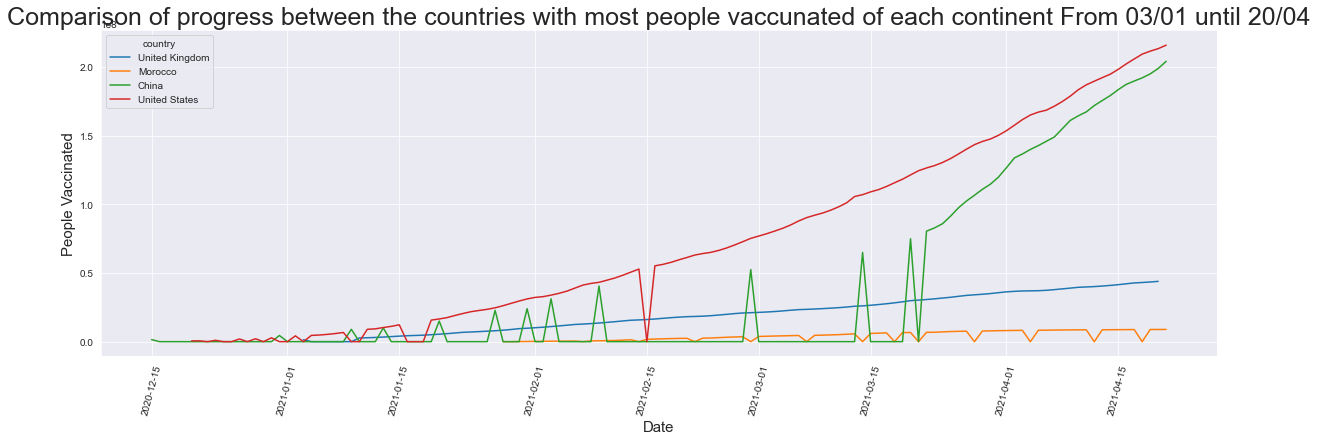

In [62]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
sns.lineplot(data= total_vaccination, x='date', y='total_vaccinations', hue = 'country', palette = 'tab10')
plt.xticks(rotation=75)
plt.title('Comparison of progress between the countries with most people vaccunated of each continent From 03/01 until 20/04',fontsize=25)
plt.xlabel('Date',fontsize=15)
plt.ylabel('People Vaccinated', fontsize=15)

### 2.Daily vaccinations

/Users/gema/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='date'>

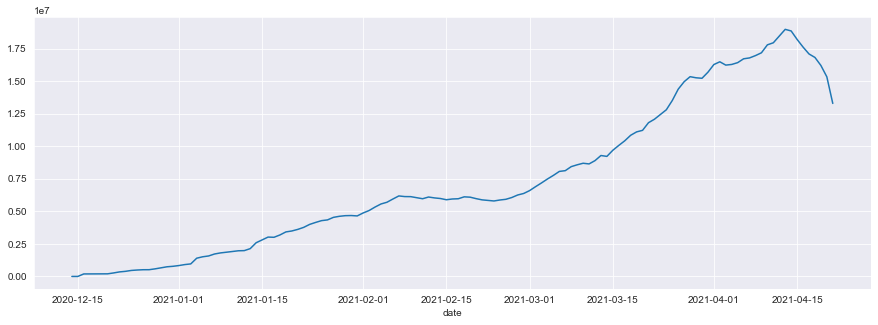

In [63]:
#daily vaccinations en todo el mundo
x= covid_vaccine_data.groupby("date").daily_vaccinations.sum()
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)

### 3. Población con mayor número de pacientes vacunados con las dos dosis

Además, también podemos estudiar en qué país está más avanzado el programa de vacunación. Para ello, tenemos que centrarnos en la variable **"people_fully_vaccinated_per_hundred"**. Esta varible refleja el ratio de la población totalmente inmunizada y la población total hasta la fecha en el país. Es importante tener en consideración este ratio porque no todos los países tienen la misma cantidad de población.


In [64]:
max_ = europe[europe['people_fully_vaccinated_per_hundred'] == np.max(europe['people_fully_vaccinated_per_hundred'])][['country','people_fully_vaccinated_per_hundred']]
max_1 = africa[africa['people_fully_vaccinated_per_hundred'] == np.max(africa['people_fully_vaccinated_per_hundred'])][['country','people_fully_vaccinated_per_hundred']]
max_2 = asia[asia['people_fully_vaccinated_per_hundred'] == np.max(asia['people_fully_vaccinated_per_hundred'])][['country','people_fully_vaccinated_per_hundred']]
max_3 = north_america[north_america['people_fully_vaccinated_per_hundred'] == np.max(north_america['people_fully_vaccinated_per_hundred'])][['country','people_fully_vaccinated_per_hundred']]

print(max_)
print(max_1)
print(max_2)
print(max_3)

            country  people_fully_vaccinated_per_hundred
iso_code                                                
GIB       Gibraltar                                91.45
             country  people_fully_vaccinated_per_hundred
iso_code                                                 
SYC       Seychelles                                51.38
         country  people_fully_vaccinated_per_hundred
iso_code                                             
ISR       Israel                                57.75
                 country  people_fully_vaccinated_per_hundred
iso_code                                                     
CYM       Cayman Islands                                44.11


In [65]:
res = europe.groupby("country")["people_fully_vaccinated_per_hundred"].agg(Numero_pacientes_vacunados="max")
vacc_Gibraltar = europe.loc[europe.country == 'Gibraltar']
vacc_Seychelles = africa.loc[africa.country == 'Seychelles']
vacc_Israel = asia.loc[asia.country == 'Israel']
vacc_Cayman = north_america.loc[north_america.country == 'Cayman Islands']
inmunized = pd.concat([vacc_Gibraltar, vacc_Seychelles, vacc_Israel, vacc_Cayman])

Text(0, 0.5, '% People FULLY Vaccinated')

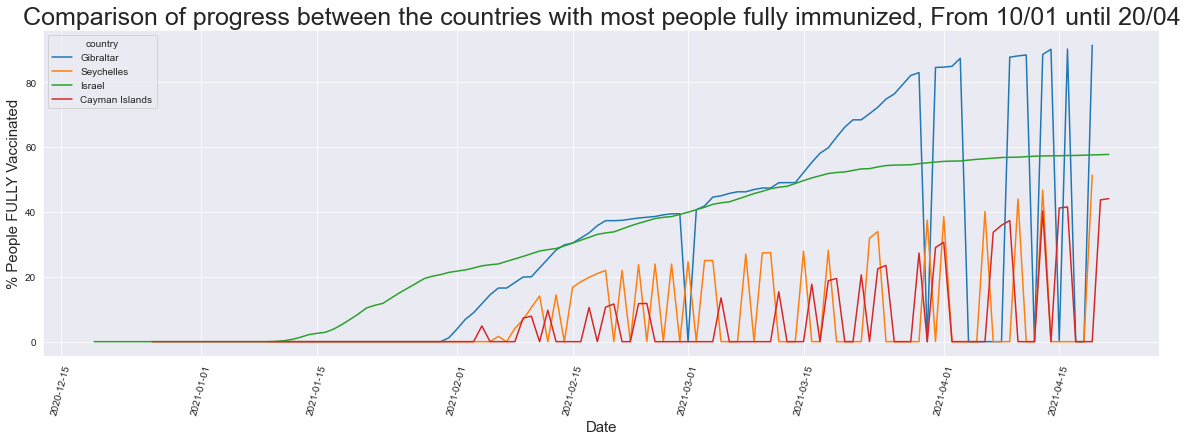

In [66]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
sns.lineplot(data= inmunized, x='date', y='people_fully_vaccinated_per_hundred', hue = 'country', palette = 'tab10')
plt.xticks(rotation=75)
plt.title('Comparison of progress between the countries with most people fully immunized, From 10/01 until 20/04',fontsize=25)
plt.xlabel('Date',fontsize=15)
plt.ylabel('% People FULLY Vaccinated', fontsize=15)

De este gráfico se pueden deducir varias cosas:

- El país que está más avanzado en su campaña de población es Gibraltar. Una de las razones principales a las que se debe esto, es que Gibraltar es un territorio pequeño (6,8 km^2) con una población de alrededor de 33000 personas. Se observa como alcanza la inmunidad de rebaño (70%) a mediados de marzo y continua subiendo. 

- Por otro lado, el segundo del mundo con mayor porcentaje de población totalmente inmunizada es Israel. Se aprecia como tiene un crecimiento bastante constante a medida que pasa el tiempo, hasta llegar a una estepa poco antes del 60%. **(El tramo verde en el que está todo a cero corresponde a diciembre de 2020 en el que no existía ninguna persona inmunizada, es un error de representación.**

- Las islas Caimán y las Seychelles comienzan su vacunación un poco más tarde, pero al ser también territorios con menos de 100000 personas, su ratio de inmunización es más elevado que otros territorios de su mismo continente. 

### 4. Top countries with fully  vaccinated people

In [67]:
covid_vaccine_data["Full_vaccinations(count)"] = covid_vaccine_data.groupby("country").people_fully_vaccinated.tail(1)
covid_vaccine_data.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States     87592646.0
India             17972744.0
United Kingdom    10775817.0
Brazil             9140452.0
England            9007092.0
Turkey             7887103.0
Indonesia          6341931.0
Russia             6300874.0
Chile              5726383.0
Germany            5724561.0
Israel             4998500.0
France             4850310.0
Italy              4773616.0
Mexico             4512826.0
Morocco            4203779.0
Spain              3611606.0
Poland             2415993.0
Romania            1686583.0
Bangladesh         1678189.0
Hungary            1453300.0
Name: Full_vaccinations(count), dtype: float64

In [68]:
fig = go.Figure(data=go.Choropleth(locations = covid_vaccine_data['country'],
                            locationmode='country names',
                            z = covid_vaccine_data["Full_vaccinations(count)"],
                            text = covid_vaccine_data['country'],       
                            colorscale = 'Reds',
                            autocolorscale=False,
                            marker_line_color='darkgray',
                            marker_line_width=0.5,
                        
                          ))

fig.update_layout(
    title_text='MAPA DE VACUNACIONES TOTALES',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))
fig.show()

In [69]:
covid_vaccine_data["Total_vaccinations(count)"] = covid_vaccine_data.groupby("country").total_vaccinations.tail(1)
covid_vaccine_data.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States           215951909.0
China                   204191000.0
India                   129646105.0
United Kingdom           43915559.0
England                  36805597.0
Brazil                   34058640.0
Germany                  23656941.0
Turkey                   20477685.0
France                   17868688.0
Indonesia                17644225.0
Russia                   16821267.0
Italy                    16271272.0
Mexico                   15003610.0
Chile                    13543699.0
Spain                    13497809.0
Canada                   10798150.0
Israel                   10367696.0
United Arab Emirates      9900002.0
Poland                    9495317.0
Morocco                   8901652.0
Name: Total_vaccinations(count), dtype: float64

/Users/gema/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Pacientes con al menos una dosis administrada')

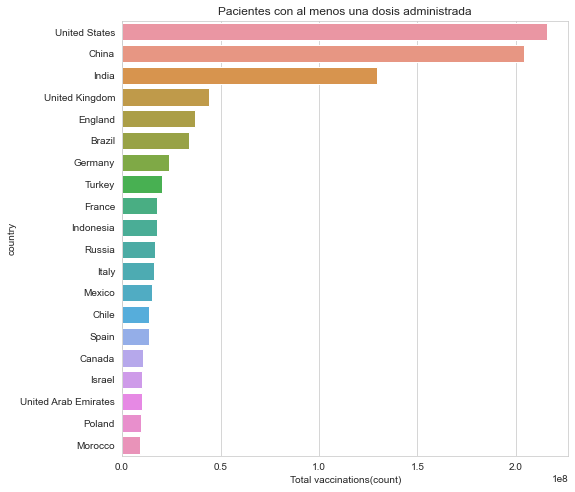

In [70]:
x= covid_vaccine_data.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total vaccinations(count)")
plt.title('Pacientes con al menos una dosis administrada')

/Users/gema/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Pacientes con ambas dosis administradas')

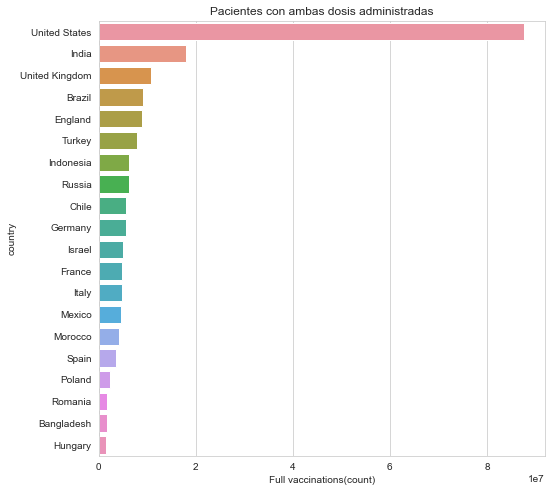

In [71]:
x= covid_vaccine_data.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Full vaccinations(count)")
plt.title('Pacientes con ambas dosis administradas')

### 5. Correlación

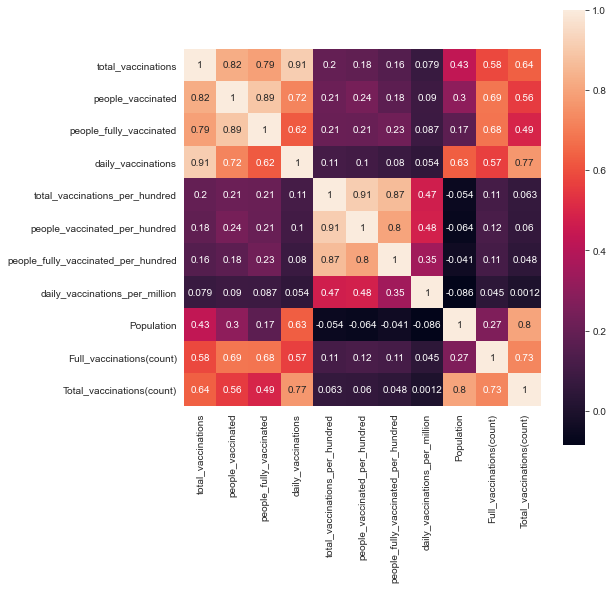

In [72]:
#correlation
plt.subplots(figsize=(8, 8))
sns.heatmap(covid_vaccine_data.corr() , annot=True, square=True )
plt.show()

# OBSEVANDO EL MAPA DE CORRELACIÓN PODEMOS DEDUCIR QUE LAS VARIABLES TOTAL_VACCINATION Y PEOPLE_VACCINATED NOS APORTAN LA MISMA INFORMACIÓN (0.99 DE CORRELACIÓN)

## Vacunas

In [73]:
""""
vaccines_grp = covid_vaccine_data.vaccines.unique()

for v in vaccines_grp:
    countries_grp = covid_vaccine_data.loc[covid_vaccine_data.vaccines==v, 'country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries_grp)}\n")
"""

'"\nvaccines_grp = covid_vaccine_data.vaccines.unique()\n\nfor v in vaccines_grp:\n    countries_grp = covid_vaccine_data.loc[covid_vaccine_data.vaccines==v, \'country\'].values\n    print(f"Vaccines: {v}: \nCountries: {list(countries_grp)}\n")\n'

Encontrar cuales son los países que más han utilizado un tipo de vacuna. 

In [74]:
#most common vaccines
covid_vaccine_data.vaccines.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2790
Oxford/AstraZeneca                                                                    2305
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1543
Pfizer/BioNTech                                                                       1324
Moderna, Pfizer/BioNTech                                                               531
Pfizer/BioNTech, Sinovac                                                               498
Sputnik V                                                                              442
Oxford/AstraZeneca, Sinovac                                                            360
Oxford/AstraZeneca, Sinopharm/Beijing                                                  329
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           302
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      292

<AxesSubplot:xlabel='count', ylabel='vaccines'>

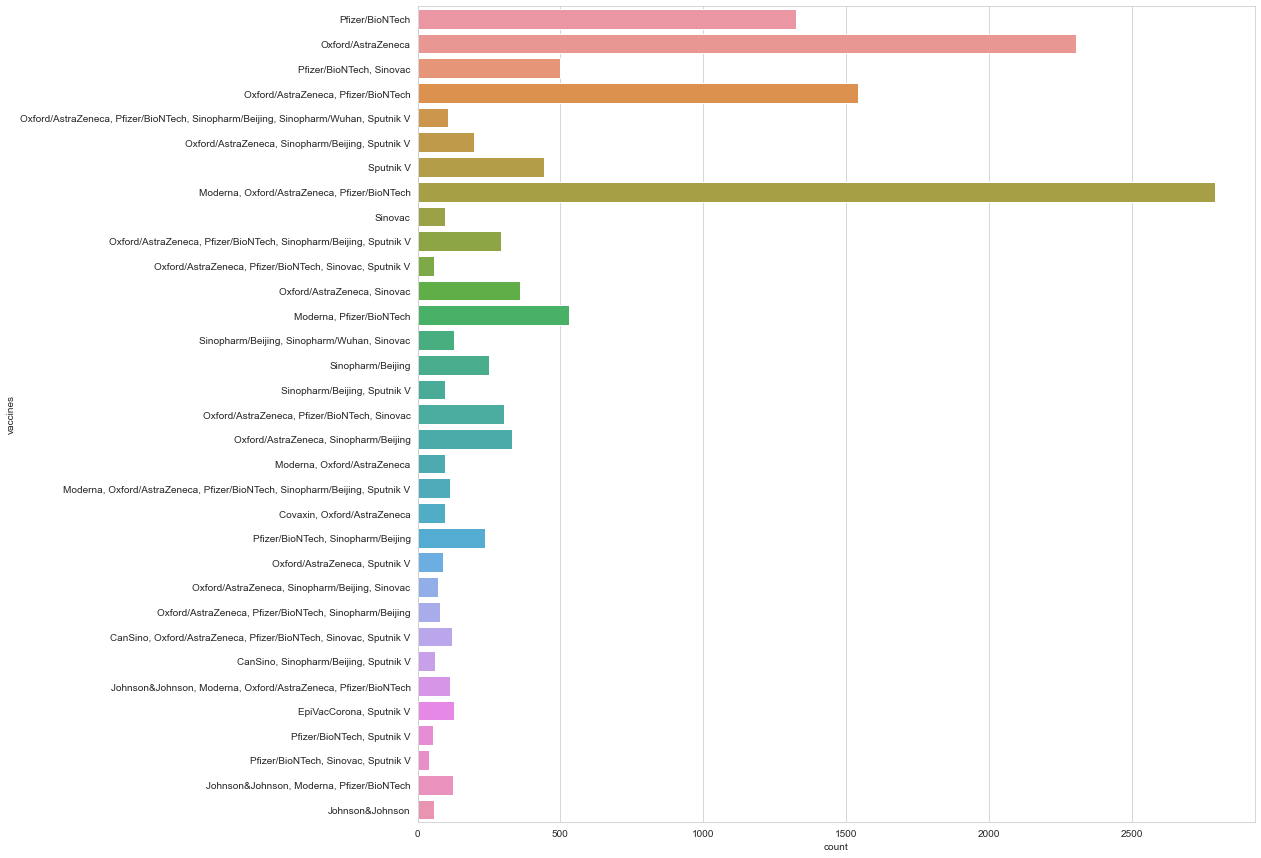

In [75]:
plt.figure(figsize=(15,15))
sns.countplot(y= "vaccines",data= covid_vaccine_data)

In [76]:
cntry_vaccine = covid_vaccine_data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 
                                                                       'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()

cntry_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']

<ipython-input-76-5ca0293ab71a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [77]:
cntry_vaccine.head(10)

Country iso_code  \
0          Afghanistan      AFG   
1              Albania      ALB   
2              Algeria      DZA   
3              Andorra      AND   
4               Angola      AGO   
5             Anguilla      AIA   
6  Antigua and Barbuda      ATG   
7            Argentina      ARG   
8              Armenia      ARM   
9                Aruba      ABW   

                                           Vaccines  Total vaccinations  \
0                                Oxford/AstraZeneca            120000.0   
1                          Pfizer/BioNTech, Sinovac            372075.0   
2                                         Sputnik V             75000.0   
3               Oxford/AstraZeneca, Pfizer/BioNTech             19064.0   
4                                Oxford/AstraZeneca            245442.0   
5                                Oxford/AstraZeneca              5835.0   
6                                Oxford/AstraZeneca             28639.0   
7  Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V           6550568.0   
8                                         Sputnik V               565.0   
9                                   Pfizer/BioNTech             43945.0   

   Percent  Daily vaccinations  Daily vaccinations per million  \
0     0.31              3000.0                            77.0   
1    12.93             17346.0                          6028.0   
2     0.17              3748.0                            85.0   
3    24.67               679.0                          8788.0   
4     0.75             10939.0                           333.0   
5    38.89               331.0                         22064.0   
6    29.24               895.0                          9139.0   
7    14.49            169014.0                          3740.0   
8     0.02                 0.0                             0.0   
9    41.16                 0.0                             0.0   

   People vaccinated  People vaccinated per hundred  People fully vaccinated  \
0           120000.0                           0.31                      0.0   
1             6073.0                           0.21                    655.0   
2                0.0                           0.00                      0.0   
3             9781.0                          12.66                   4484.0   
4           245442.0                           0.75                      0.0   
5             5835.0                          38.89                      0.0   
6            28639.0                          29.24                      0.0   
7          5722607.0                          12.66                 827961.0   
8              565.0                           0.02                      0.0   
9            27511.0                          25.77                  16434.0   

   People fully vaccinated percent  
0                             0.00  
1                             0.02  
2                             0.00  
3                             5.80  
4                             0.00  
5                             0.00  
6                             0.00  
7                             1.83  
8                             0.00  
9                            15.39

In [78]:
vaccines_grp = cntry_vaccine.Vaccines.unique()

for v in vaccines_grp:
    countries_grp = cntry_vaccine.loc[cntry_vaccine.Vaccines==v, 'Country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries_grp)}\n")

Vaccines: Oxford/AstraZeneca: 
Countries: ['Afghanistan', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Bhutan', 'Botswana', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Dominica', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guyana', 'Jamaica', 'Kosovo', 'Lesotho', 'Malawi', 'Mali', 'Mauritius', 'Moldova', 'Mongolia', 'Montserrat', 'Myanmar', 'Nauru', 'Nepal', 'Nigeria', 'Papua New Guinea', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Sierra Leone', 'Solomon Islands', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Taiwan', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Uganda', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Zambia']

Vaccines: Pfizer/BioNTech, Sinovac: 
Countries: ['Albania', 'Chile', 'Colombia', 'Hong Kong', 'Malaysia', 'Turkey']

Vaccines: Sputnik V: 
Countries: ['Algeria', 'Armenia', 'Belarus', 'Guinea', '

# PARTE 2: Españita